Param: 0.100000, Train: 0.760, Test: 0.480
Param: 0.010000, Train: 0.800, Test: 0.540
Param: 0.001000, Train: 0.800, Test: 0.560
Param: 0.000100, Train: 0.800, Test: 0.560
Param: 0.000010, Train: 0.860, Test: 0.600
Param: 0.000001, Train: 0.800, Test: 0.540


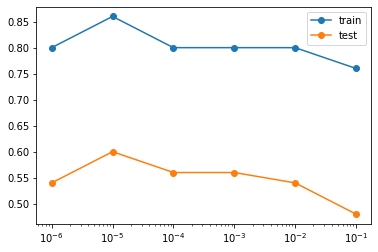

In [6]:
# grid search regularization values for moons dataset
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 50
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
    
    # define model
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    model.fit(trainX, trainy, epochs=4000, verbose=0)
    
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
    all_train.append(train_acc)
    all_test.append(test_acc)
    
# plot train and test means
pyplot.semilogx(values, all_train, label='train', marker='o')
pyplot.semilogx(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()